In [4]:
# Rendezvous Project

# Instructions:
# Set desired prediction distance (recommender <= 18 hours = 1080 min)
# Run scrapper, then run data processor
# Train TBATS model, run (may take a few minutes)

In [9]:
# Settings component

# How many minutes ahead of the last data point (current time) should the model make its prediction
minutes_ahead = 300
start_date = 'Not Default'
d_hall = 'Epicuria'

In [8]:
# Data Scrapper

!python3 to_csv.py d_data.csv

In [6]:
# Data Processor

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

net_data = pd.read_csv('d_data.csv')
net_data['time'] = pd.to_datetime(net_data['time'], format='%Y-%m-%d %H:%M:%S')

# Use to manually set time intervals
y1, m1, d1, h1 = 2022, 10, 22, 15
y2, m2, d2, h2 = 2022, 10, 29, 15

# Default time settings
now = datetime.now()
if (start_date == 'Default'):
    d2 = now.day
    h2 = now.hour-3

base = datetime(y1, m1, d1, h1, 1, 46, 0).timestamp()
end = datetime(y2, m2, d2, h2, 56, 46, 0).timestamp()
arr_size = int((end-base)/300) + 1

act_lvls = [1]*arr_size
time_axis = [datetime.fromtimestamp(base+300*x) for x in range(0, arr_size)]

for i in range(len(net_data)):
    if ((base <= net_data['time'][i].timestamp() <= end) and net_data['hall'][i] == d_hall):
        index = int((round((net_data['time'][i].timestamp()-base)/300)))+1
        act_lvls[index] = net_data['activity'][i]
        if (net_data['time'][i].hour <= 11):
            act_lvls[index] = 0

In [7]:
# Load and fit model

from tbats import TBATS

if __name__ == '__main__':
    np.random.seed(2342)

    
    # Create estimator
    estimator = TBATS(seasonal_periods=[288, 2016])
    
    # Fit model
    fitted_model = estimator.fit(act_lvls)

Text(0, 0.5, 'Activity Level')

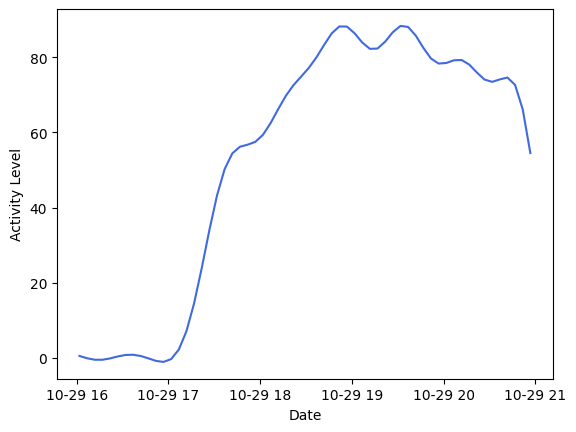

In [10]:
# Forecasted plot

act_forecasted = fitted_model.forecast(steps=int(minutes_ahead/5))
base = time_axis[-1].timestamp()
forecast_time = [datetime.fromtimestamp(base+300*x) for x in range(1, int(minutes_ahead/5)+1)]

plt.plot(forecast_time, act_forecasted, color='royalblue')
plt.xlabel("Date")
plt.ylabel("Activity Level")

Text(0, 0.5, 'Activity Level')

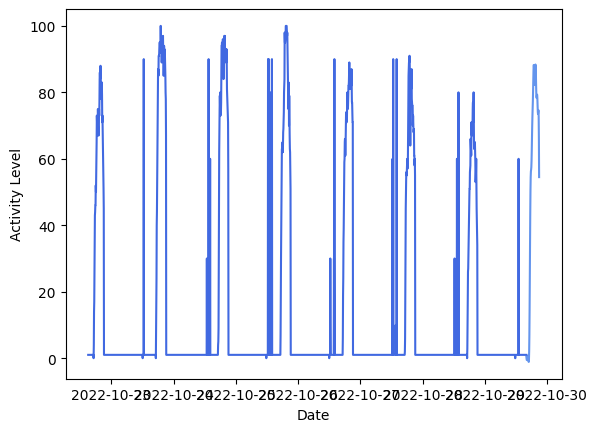

In [12]:
# Total plot (recorded and forecasted data)
# Forecasted data is lighter blue shade

base_data = time_axis[0].timestamp()
time_data = [datetime.fromtimestamp(base_data+300*x) for x in range(1, arr_size+1)]

plt.plot(forecast_time, act_forecasted, color='cornflowerblue')
plt.plot(time_data, act_lvls, color='royalblue')
plt.xlabel("Date")
plt.ylabel("Activity Level")